# Tutorial 7

## Random Variable and Distributions

### Se buscan explicar las distribuciones de probabilidad, se empiza con las distribución normal

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Se defina la función que llena un arreglo de tamaño 10000 con numeros del  1 al 6
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print (series)

[2 5 3 ... 6 1 3]


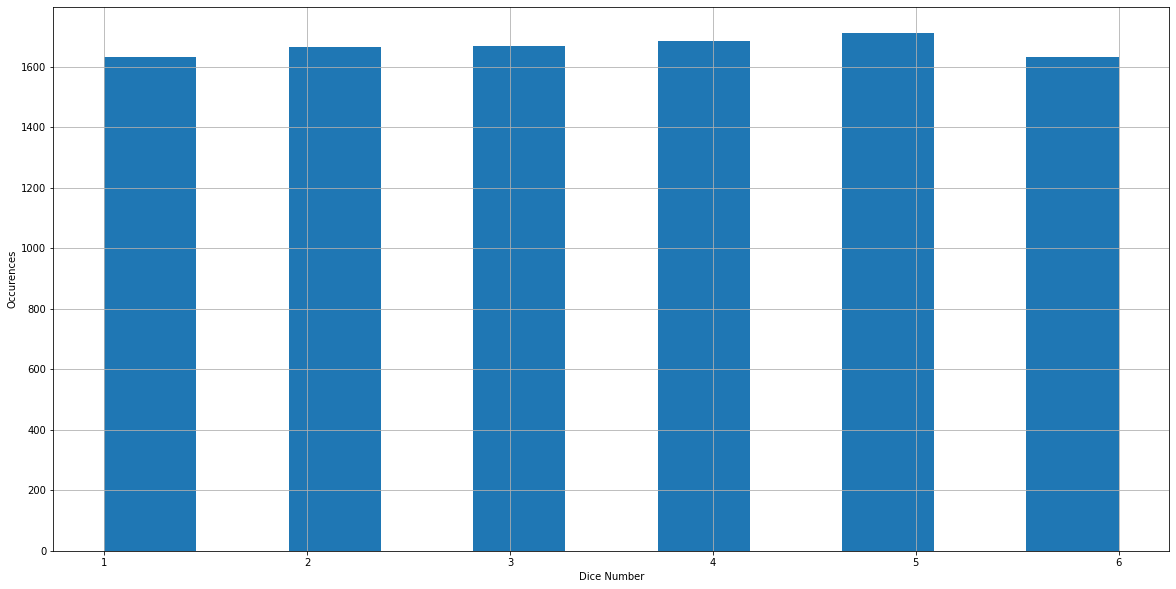

In [3]:
# Creacion de la grafica relacionada

plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [4]:

# Permite determinar la frecuencia con que hay un numero menor o igual a 3 en el arrreglo
print (len([x for x in series if x <= 3])/float(len(series)))

# Y se calcula la media 
print (np.mean(series))

0.4968
3.5081


### Distribución binomial 

$$
    C_n^K=\frac{n!}{(n-k)! k!}
$$



Se puede generar una serie de numeros de los cuales se obtendra un numero para generar una distribución binomial mas adelante.
En donde hay una tasa exito de p = 0.7.

In [5]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

In [9]:
res = [trial() for x in range(10)]
print(sum(res))

7


In [10]:
# Ahora se pueden generar numeros de la distribución binomial

def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print (binomial(8))

0.23


In [11]:
#Ahora se guardan las probabilidades en un arreglo

prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print(prob_s)

1     0.0003
2     0.0018
3     0.0097
4     0.0394
5     0.1044
6     0.1962
7     0.2631
8     0.2323
9     0.1212
10    0.0307
dtype: float64


In [14]:
import math

# En este caso se buscan simular las frecuencias
print ((float(math.factorial(10))/(math.factorial(7)*math.factorial(10-7)))*(0.7**7)*(0.3**3))
print ((float(math.factorial(10))/(math.factorial(8)*math.factorial(10-8)))*(0.7**8)*(0.3**2))

0.2668279319999998
0.23347444049999988


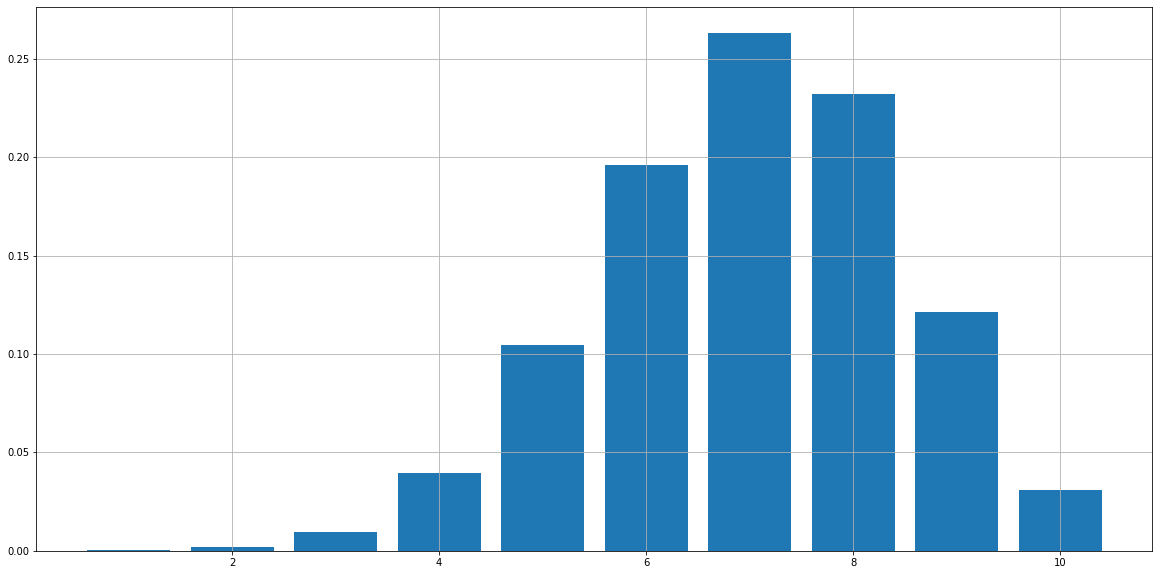

In [15]:
# Y ahora hacer la grafica de las frecuencias

plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

### Distribución normal 

In [24]:

!pip install quandl


# Primero se traen los datos para poder calcular la ditribución de probabilidad 
import quandl
quandl.ApiConfig.api_key = 'DDoRXaXzshJm_UGBYDVL'

# Es preferible usar los datos de Microsoft
spy_table = quandl.get('EOD/MSFT')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

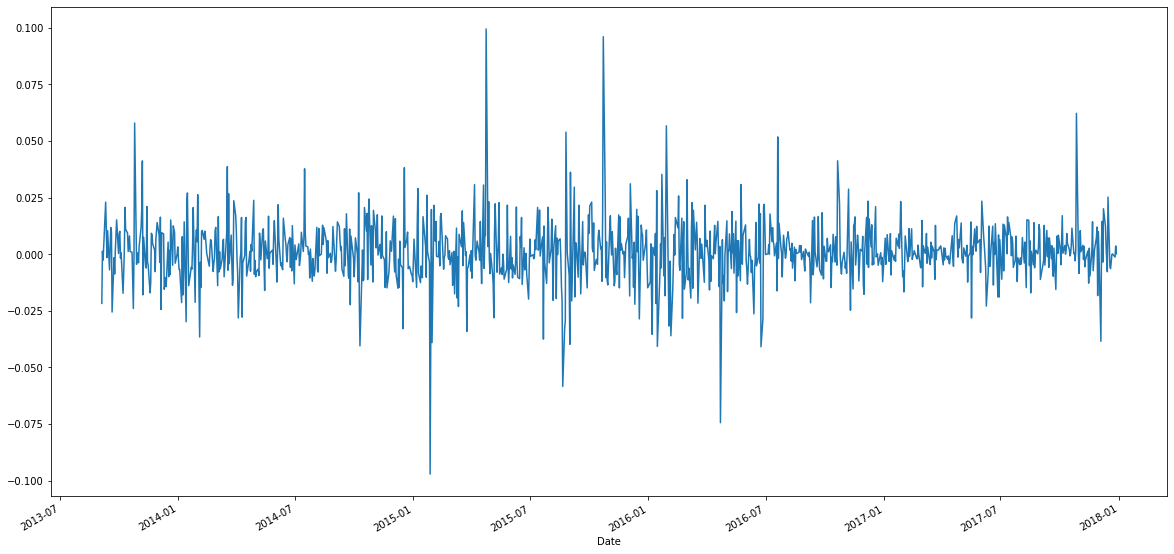

In [25]:
# Se pueden graficar los datos, donde se observar que hubo una anormalidad a mediados del 2014

plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

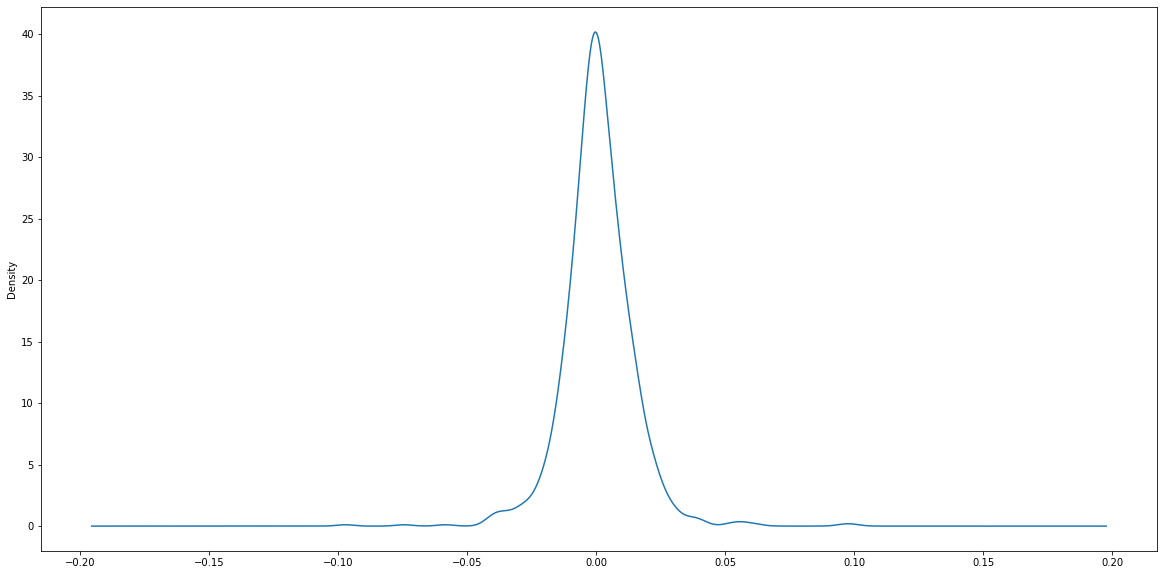

In [26]:
# Si se grafica la función de densisdad, es posible ver como se genera un pico muy pronunciado en 0.0   

plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

<Figure size 3600x1440 with 0 Axes>

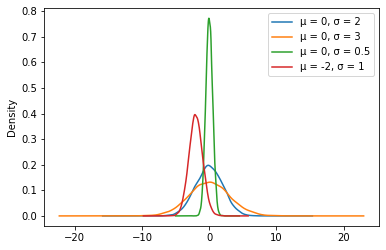

In [30]:
# Se puede intentar demostarr la grafica de la curva normal usando diferentes medias y varianzas
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(50,20))
df.plot.density()
plt.show()

# Fin